In [21]:
import pandas as pd 
import numpy as np 
from datetime import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [23]:
stock_startdate = '2013-01-01'

In [24]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-06-27'

In [25]:
# Get daily closing price of stocks

daily_prices = pd.DataFrame()
for stocks in assets: 
    daily_prices[stocks] = web.DataReader(stocks, data_source='yahoo',start=stock_startdate, end=today)['Adj Close']

In [26]:
daily_prices

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,16.488508,13.227143,352.369232
2013-01-02,28.000000,257.309998,17.010899,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.796177,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.328323,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.232281,14.171429,366.003143
...,...,...,...,...,...
2021-06-21,332.290009,3453.959961,132.300003,497.000000,2529.100098
2021-06-22,339.029999,3505.439941,133.979996,508.820007,2539.989990
2021-06-23,340.589996,3503.820068,133.699997,512.739990,2529.229980


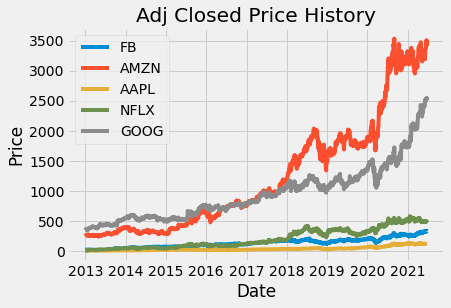

In [27]:
# Plot daily prices of stocks 

for c in daily_prices.columns.values:
    plt.plot(daily_prices[c], label=c)
    
plt.title('Adj Closed Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(daily_prices.columns.values, loc='upper left')
plt.show()

In [28]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


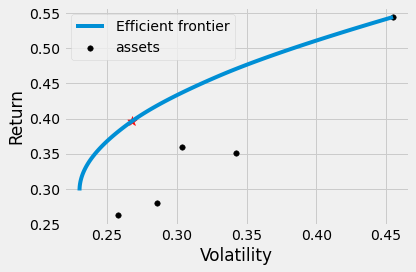

In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

# Plot Efficient Frontier 

mu = expected_returns.mean_historical_return(daily_prices)
S = risk_models.sample_cov(daily_prices)
ef = EfficientFrontier(mu,S,weight_bounds=(0,1))

# Efficient Frontier plot
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Tangency Portfolio plot 
weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")


In [33]:
# Tangency Portfolio Details 

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.16036), ('AMZN', 0.29556), ('AAPL', 0.23577), ('NFLX', 0.30831), ('GOOG', 0.0)])
Expected annual return: 39.7%
Annual volatility: 26.8%
Sharpe Ratio: 1.41


(0.3965308948013103, 0.26794126292607856, 1.4052740167354894)